In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pylab, pyplot
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)
plt.style.use("seaborn")
pd.set_option('display.max_rows', 600)
plt.rcParams.update({'font.family':'Times New Roman'})
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')

# Sklearn Libraries
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from catboost import CatBoostRegressor

# Don't do anything on the data just import it and fit the model

In [2]:
df = pd.read_excel("Carius.xlsx")

In [3]:
df['Degredation'].idxmax()

178

In [4]:
df.loc[df['Degredation'] == df['Degredation'].max()]

,pH,PPM,Loading,Time,Degredation
178,6,30,2.0,120,0.914
179,6,30,2.0,150,0.914


In [5]:
df.sort_values("Degredation", ascending=False)

,pH,PPM,Loading,Time,Degredation
179,6,30,2.0,150,0.9140
178,6,30,2.0,120,0.9140
177,6,30,2.0,90,0.8850
173,6,30,1.5,120,0.8680
174,6,30,1.5,150,0.8680
176,6,30,2.0,60,0.8570
279,8,50,2.0,150,0.8530
172,6,30,1.5,90,0.8490
278,8,50,2.0,120,0.8460
218,6,70,2.0,120,0.8440


In [6]:
df.columns

Index(['pH', 'PPM', 'Loading', 'Time', 'Degredation'], dtype='object')

In [7]:
y = df["Degredation"]

In [8]:
X = df[['pH', 'PPM', 'Loading', 'Time',]]

In [9]:
X.shape

(400, 4)

In [10]:
y.shape

(400,)

In [11]:
X.head()

,pH,PPM,Loading,Time
0,2,30,0.5,30
1,2,30,0.5,60
2,2,30,0.5,90
3,2,30,0.5,120
4,2,30,0.5,150


In [12]:
model = CatBoostRegressor(iterations=781, learning_rate=0.15398886238542636)
model.fit(X, y)

0:	learn: 0.2066488	total: 55.6ms	remaining: 43.3s
1:	learn: 0.1885622	total: 58.8ms	remaining: 22.9s
2:	learn: 0.1738846	total: 61.4ms	remaining: 15.9s
3:	learn: 0.1605841	total: 63.7ms	remaining: 12.4s
4:	learn: 0.1489957	total: 66.1ms	remaining: 10.3s
5:	learn: 0.1389644	total: 68.5ms	remaining: 8.85s
6:	learn: 0.1297674	total: 71ms	remaining: 7.85s
7:	learn: 0.1213190	total: 73.2ms	remaining: 7.07s
8:	learn: 0.1138032	total: 75.5ms	remaining: 6.47s
9:	learn: 0.1061608	total: 77.8ms	remaining: 6s
10:	learn: 0.1000274	total: 79.9ms	remaining: 5.59s
11:	learn: 0.0951043	total: 82.3ms	remaining: 5.27s
12:	learn: 0.0893462	total: 84.5ms	remaining: 4.99s
13:	learn: 0.0847935	total: 85.3ms	remaining: 4.67s
14:	learn: 0.0837472	total: 85.9ms	remaining: 4.39s
15:	learn: 0.0790547	total: 86.8ms	remaining: 4.15s
16:	learn: 0.0744030	total: 87.7ms	remaining: 3.94s
17:	learn: 0.0706868	total: 88.5ms	remaining: 3.75s
18:	learn: 0.0666748	total: 89.4ms	remaining: 3.58s
19:	learn: 0.0643459	total:

335:	learn: 0.0087526	total: 218ms	remaining: 289ms
336:	learn: 0.0087447	total: 219ms	remaining: 289ms
337:	learn: 0.0087285	total: 219ms	remaining: 288ms
338:	learn: 0.0087048	total: 220ms	remaining: 287ms
339:	learn: 0.0086910	total: 221ms	remaining: 286ms
340:	learn: 0.0086720	total: 221ms	remaining: 286ms
341:	learn: 0.0086601	total: 222ms	remaining: 285ms
342:	learn: 0.0086432	total: 222ms	remaining: 284ms
343:	learn: 0.0086293	total: 223ms	remaining: 283ms
344:	learn: 0.0086125	total: 223ms	remaining: 282ms
345:	learn: 0.0085930	total: 224ms	remaining: 281ms
346:	learn: 0.0085765	total: 224ms	remaining: 280ms
347:	learn: 0.0085531	total: 224ms	remaining: 279ms
348:	learn: 0.0085367	total: 225ms	remaining: 278ms
349:	learn: 0.0085013	total: 225ms	remaining: 277ms
350:	learn: 0.0084769	total: 226ms	remaining: 276ms
351:	learn: 0.0084610	total: 226ms	remaining: 276ms
352:	learn: 0.0084423	total: 226ms	remaining: 275ms
353:	learn: 0.0084242	total: 227ms	remaining: 274ms
354:	learn: 

674:	learn: 0.0049606	total: 378ms	remaining: 59.3ms
675:	learn: 0.0049572	total: 378ms	remaining: 58.8ms
676:	learn: 0.0049518	total: 379ms	remaining: 58.2ms
677:	learn: 0.0049452	total: 380ms	remaining: 57.7ms
678:	learn: 0.0049407	total: 381ms	remaining: 57.2ms
679:	learn: 0.0049323	total: 382ms	remaining: 56.7ms
680:	learn: 0.0049291	total: 382ms	remaining: 56.1ms
681:	learn: 0.0049173	total: 383ms	remaining: 55.6ms
682:	learn: 0.0049129	total: 383ms	remaining: 55ms
683:	learn: 0.0049043	total: 384ms	remaining: 54.5ms
684:	learn: 0.0048994	total: 385ms	remaining: 53.9ms
685:	learn: 0.0048959	total: 385ms	remaining: 53.3ms
686:	learn: 0.0048887	total: 386ms	remaining: 52.8ms
687:	learn: 0.0048830	total: 386ms	remaining: 52.2ms
688:	learn: 0.0048777	total: 387ms	remaining: 51.6ms
689:	learn: 0.0048730	total: 387ms	remaining: 51ms
690:	learn: 0.0048703	total: 387ms	remaining: 50.5ms
691:	learn: 0.0048645	total: 388ms	remaining: 49.9ms
692:	learn: 0.0048571	total: 389ms	remaining: 49.3

In [13]:
from PyALE import ale

PyALE._ALE_generic:INFO: Discrete feature detected.


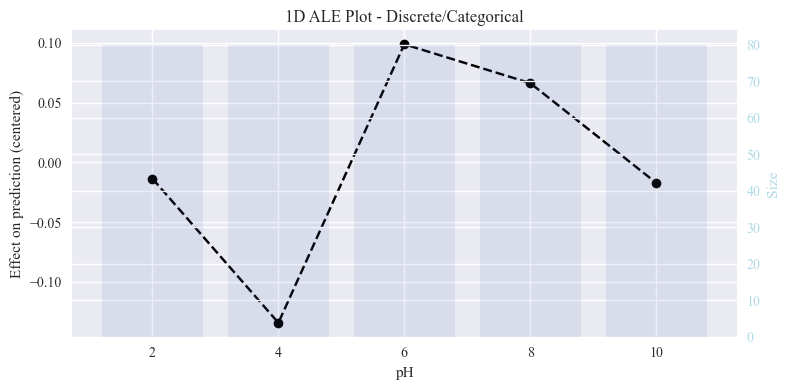

In [41]:
## 1D - continuous - no CI
ale_eff = ale(X=X, model=model, feature=["pH"], grid_size=50, include_CI=False)
plt.savefig("ph_ALE.jpg", bbox_inches = 'tight', dpi=700);

PyALE._ALE_generic:INFO: Discrete feature detected.


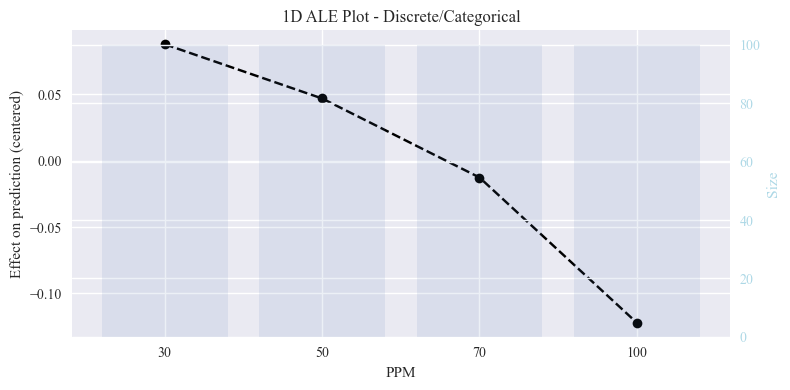

In [40]:
## 1D - continuous - no CI
ale_eff = ale(X=X, model=model, feature=["PPM"], grid_size=50, include_CI=False)
plt.savefig("PPM_ALE.jpg", bbox_inches = 'tight', dpi=700);

PyALE._ALE_generic:INFO: Discrete feature detected.


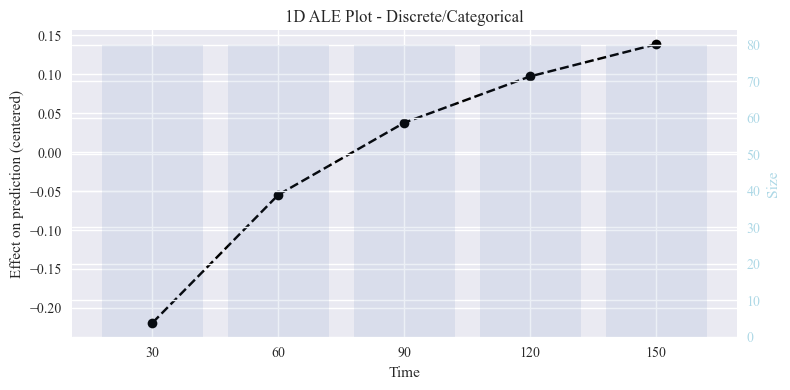

In [39]:
## 1D - continuous - no CI
ale_eff = ale(X=X, model=model, feature=["Time"], grid_size=50, include_CI=False)
plt.savefig("Time_ALE.jpg", bbox_inches = 'tight', dpi=700);

PyALE._ALE_generic:INFO: Discrete feature detected.


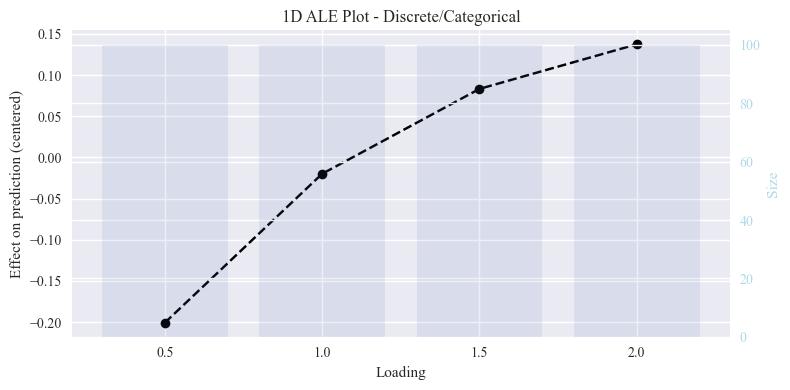

In [38]:
## 1D - continuous - no CI
ale_eff = ale(X=X, model=model, feature=["Loading"], grid_size=50, include_CI=False)
plt.savefig("loading_ALE.jpg", bbox_inches = 'tight', dpi=700);